This notebook demonstrate the use of some of the different matter power spectra functions and classes. Note that it relies von [`camb`](http://camb.readthedocs.io/en/latest/) for most of its current functionality. Unless otherwise noted, all units are Mpc$^{-1}$ for wavenumbers $k$ and Mpc for comoving distance $x$.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from quickspec.mps import lin, mps
from quickspec import cosmo

In [3]:
sns.set_style('whitegrid')

# Inital power spectrum

We use `mps.initial_ps` to get the power spectrum of the initial fluctuations with parameters $\rm amp$, $n_s$, and $k_{\rm pivot}$.

In [4]:
mps_initial = mps.initial_ps(amp=2.2e-9, n_s=0.96, k_pivot=0.05)
kvec = np.logspace(-4, 3, 100)
pk = mps_initial.p(kvec)

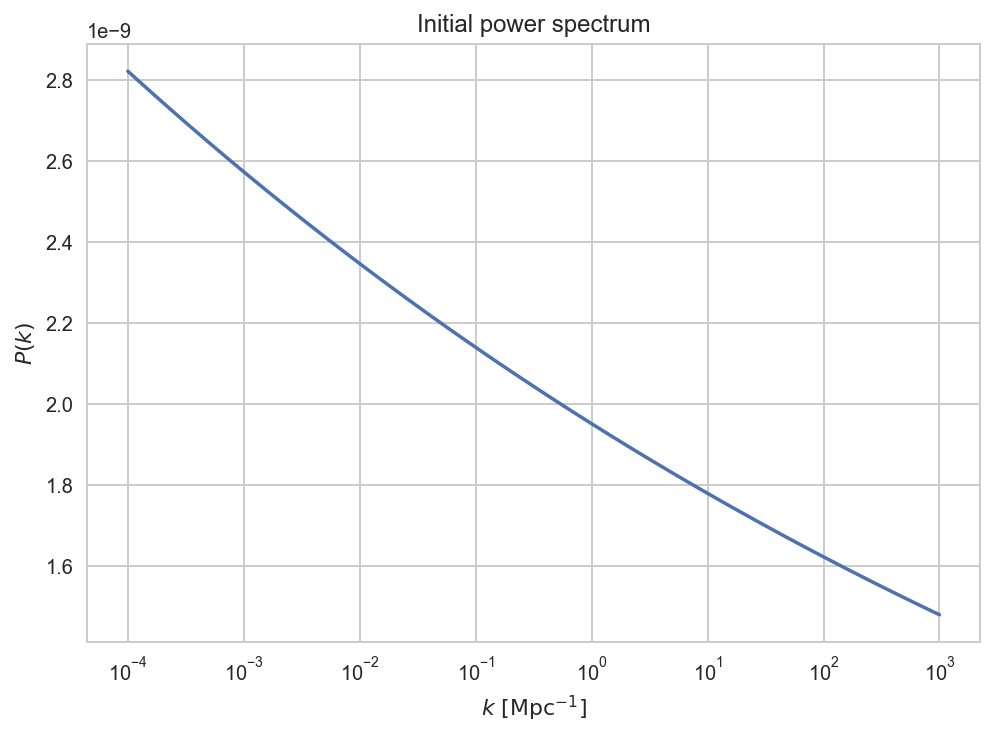

In [5]:
plt.plot(kvec, pk)
plt.semilogx();

# labels & legends
plt.xlabel(r'$k \ [\rm Mpc^{-1}]$')
plt.ylabel(r'$P(k)$')
plt.title('Initial power spectrum');

# Linear matter power spectrum from `camb`

In [6]:
mylcdm = cosmo.lcdm(
    omr=0.0,
    omb=0.049,
    omc=0.265,
    oml=0.686,
    H0=67.3)

In [7]:
mps = lin.mps_camb(mylcdm, mps_initial, nonlinear=True)

Take a look at the limits of the redshifts $z$ and wavenumbers $k$.

In [8]:
print('Limits for k:', mps.kmin, mps.kmax)
print('Limits for z:', mps.zmin, mps.zmax)

Limits for k: 6.72327e-07 134.7346
Limits for z: 0.0 2048.0


In [30]:
kk = np.logspace(-4, 1, 100)

In [31]:
zz = [0, 1, 3, 10]

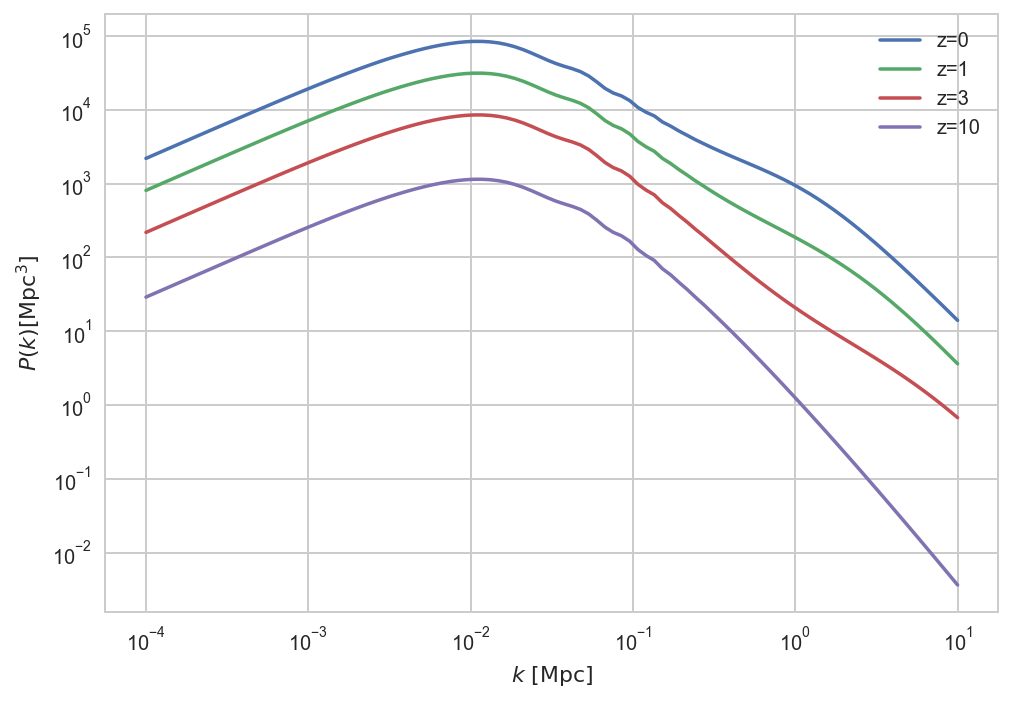

In [32]:
[plt.plot(kk, mps.p_kz(kk, z=z), label=f'z={z}') for z in zz]
plt.loglog()

# labels & legends
plt.title('Matter power spectrum')
plt.xlabel(r'$k\ [\rm Mpc]$')
plt.ylabel(r'$P(k)[\rm Mpc^3]$')

plt.legend();